# First Task 

In [97]:
import numpy as np
mean, std= 1000, 10
number_of_samples=100

#function to test the mean
def mean_function(X):
    return np.sum(X)/X.shape[0]

#function to test the deviation
def standard_deviation_function(X,mean):
    return np.sqrt(np.sum((X-mean)**2)/X.shape[0])

#Our first sample
X = np.random.normal(mean,std,number_of_samples)

#Resampling until obtaining a sample which corresponds to our criteria
i=0
while abs(mean-mean_function(X))>0.5 or abs(std-standard_deviation_function(X,mean_function(X)))>0.1:
    i+=1
    X = np.random.normal(mean,std,number_of_samples)    
    

### We are now checking the mean of our generated list of values:

In [98]:
abs(mean-mean_function(X))

0.15999810401956438

### Checking the standard deviation:

In [99]:
abs(std-standard_deviation_function(X,mean_function(X)))

0.046554073227561332

In [4]:
i

31

# Second Task

In [5]:
#We will choose an arbitrary N

def simulate(N):
    List_of_couples=[[] for _ in range(N)]
    FLAG=[False for i in range(N)]

    while not all(FLAG):
        for i in range(len(List_of_couples)):
            item=np.random.random()
            if not FLAG[i]:
                #test if it is a girl
                #Equiprobability to have either a boy or a girl
                if item>.5 :
                    List_of_couples[i]+=[0]
                #Then it is a boy
                else :
                    List_of_couples[i]+=[1]
                    FLAG[i]=True

    #Long-term Ratio
    Ratio_parameter=reduce(lambda x,y:x+y,List_of_couples)
    Final_Ratio=sum(Ratio_parameter)/float(len(Ratio_parameter)-sum(Ratio_parameter))
    
    return Final_Ratio


#### We will fix a number of couples in a country each time and calculate the long-term ratio:

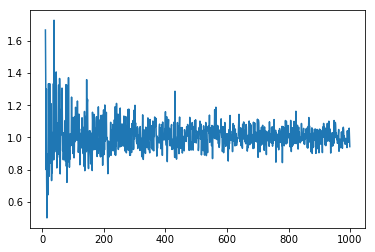

In [6]:
import matplotlib.pyplot as plt


X=range(10,1000,1)
Y=map(simulate,X)

plt.plot(X,Y)
plt.show()

## The long-term ratio of boys to girls in the country is equal to 1

# Thrid Task
##### Importing data after assigning the attributes :

In [7]:
import pandas as pd
import numpy as np
names=["Age","Workclass","fnlwgt","Education","Education-number","Marital-Status","Occupation",
      "Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Native_Country","Salary"]
data=pd.read_csv('adult.data',names=names)

Quick exploratory data analysis :

In [8]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_Country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
data.describe()

,Age,fnlwgt,Education-number,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Creating a binary-valued target from the salary attribute:

In [11]:
def transform(x):
    if x==' <=50K':
        return 0
    else:
        return 1
    
data['Superior_Inferior']=map(transform,data['Salary'])

Separating numerical and non-numerical attributes:

In [12]:
non_numerics = [x for x in data.columns \
                if not (data[x].dtype == np.float64 \
                        or data[x].dtype == np.int64)]

numerics= [x for x in data.columns \
                if (data[x].dtype == np.float64 \
                        or data[x].dtype == np.int64)]

Studying a certain type of categorical values and seeing if there is a significatn attribute to work on:

In [13]:
vcSeries=[]
for el in non_numerics:
    if len(data[el].value_counts()) == 2:
        print el

Sex
Salary


Checking the values of categorical variables: 

In [14]:
for el in non_numerics:
    print data[el].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital-Status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

Having found a special character to get rid of, let us then filter our data:

In [15]:
def test(string):
    return True if '?' in string else False

def return_list_to_filter(non_numerics):
    list_to_filter=[]
    for el in non_numerics:
        if any(test(element) for element in data[el]):
            list_to_filter.append(el)
    return list_to_filter


In [101]:
def filter_string(string):
    return False if '?' in string else True

data=data[map(filter_string,list(data.Workclass))]
data=data[map(filter_string,list(data.Occupation))]
data=data[map(filter_string,list(data.Native_Country))]
data.head()

,Age,Workclass,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_Country,Salary,Superior_Inferior
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [17]:
#To test if our categorical data is perfeclty filtered
return_list_to_filter(non_numerics)

[]

In [18]:
#Make sure our numerical data do not contain non-numerical values
def filter_int_attributes(numerics):
    list_to_filter=[]
    for el in numerics:
        if not sum(data[el].notnull())==len(data):
            list_to_filter.append(el)
    return list_to_filter
        
filter_int_attributes(numerics)    

[]

Checking the Salary distribution:

In [19]:
data['Salary'].value_counts()

 <=50K    22654
 >50K      7508
Name: Salary, dtype: int64

In [20]:
data["Sex"]=data['Sex'].map(lambda x:x.replace(" ",""))
data["Salary"]=data['Salary'].map(lambda x:x.replace(" ",""))

Male Salary distribution:

In [21]:
data[data['Sex']=='Male']['Salary'].value_counts()

<=50K    13984
>50K      6396
Name: Salary, dtype: int64

Female Salary distribution:

In [22]:
data[data['Sex']=='Female']['Salary'].value_counts()

<=50K    8670
>50K     1112
Name: Salary, dtype: int64

In [23]:
#Salary distribution
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Studying the attributes after separating each of the Salary target ( above 50k or under 50k ):

Superior_Inferior
0    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
dtype: object

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


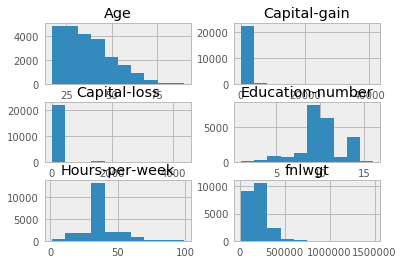

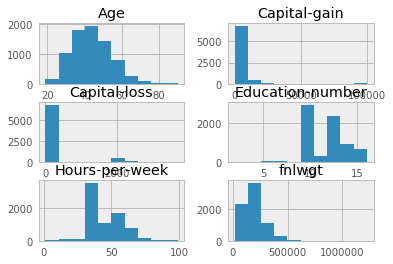

In [24]:
data.groupby('Superior_Inferior').hist()

Let us study the correlations between the variables:

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


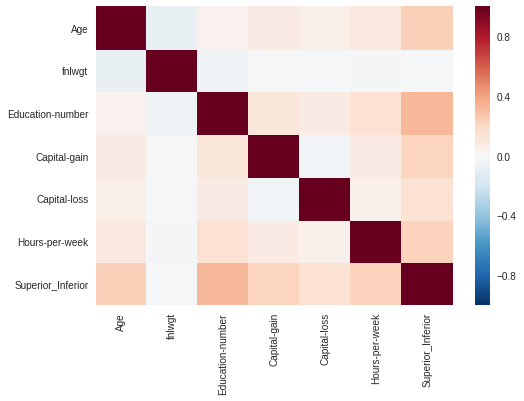

In [25]:
import seaborn as sns
corr = data.corr()

# plot the heatmap
sns.heatmap(corr)

It appears that there are no significant correlations to take into account. We shall then continue with all the variables to build our models: 

In [26]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "15pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '150px', 'font-size': '15pt'})\
    .set_precision(2)\
    .set_table_styles(magnify())

We will create a function which takes balanced samples of data based on the two values of our target attribute after precising the number of samples :

In [27]:
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection

def extract(data,N_Samples):

    ## Sample balanced data
    first_part=data[data['Superior_Inferior']==0][:N_Samples/2]
    second_part=data[data['Superior_Inferior']==1][:N_Samples/2]

    resampled_data=pd.concat([first_part,second_part],ignore_index=True)
    return resampled_data


In [28]:
##Shuffle and balance data to make it more random
resampled_data=extract(data,2000).sample(frac=1).reset_index(drop=False)
resampled_data.head()

,index,Age,Workclass,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_Country,Salary,Superior_Inferior
0,1566,36,Private,183892,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,44,United-States,>50K,1
1,589,25,Private,499233,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
2,255,22,Private,410439,HS-grad,9,Married-spouse-absent,Sales,Not-in-family,White,Male,0,0,55,United-States,<=50K,0
3,310,23,Private,81281,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,0
4,463,24,Private,556660,HS-grad,9,Never-married,Exec-managerial,Other-relative,White,Male,4101,0,50,United-States,<=50K,0


Splitting our data :

In [30]:
from sklearn.model_selection import train_test_split

input_attributes=["Age","Workclass","fnlwgt","Education","Education-number","Marital-Status","Occupation",
      "Relationship","Race","Sex","Capital-gain","Capital-loss","Hours-per-week","Native_Country"]

train, test = train_test_split(resampled_data, test_size = .15)

X_train=train[input_attributes]
y_train=train['Superior_Inferior']

X_test=test[input_attributes]
y_test=test['Superior_Inferior']


We include numerical attributes to create our model input:

In [31]:
numerics_train=['Age','fnlwgt','Education-number','Capital-gain','Capital-loss','Hours-per-week']
X_train.head()


,Age,Workclass,fnlwgt,Education,Education-number,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_Country
121,37,Private,143912,HS-grad,9,Divorced,Transport-moving,Not-in-family,White,Male,0,0,50,United-States
1316,48,State-gov,55863,Doctorate,16,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,1902,46,United-States
463,53,Private,346253,HS-grad,9,Divorced,Sales,Own-child,White,Female,0,0,35,United-States
400,71,Private,269708,Bachelors,13,Divorced,Tech-support,Own-child,White,Female,2329,0,16,United-States
176,33,Private,182556,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States


Our first model Support Vector Machines:

In [32]:
import matplotlib.pyplot as plt
from sklearn import manifold, decomposition 

from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

kernels=['rbf']
print('SVM results: ')

for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train[numerics_train],y_train)
    pred=clf.predict(X_test[numerics_train])
    print('Accuracy for SVM using '+kernel+ ' kernel : ',accuracy_score(pred,y_test))


SVM results: 
('Accuracy for SVM using rbf kernel : ', 0.46333333333333332)


We append some of the other linear and non-linear models for our task:

In [33]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time 

classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('MultinomialNB', MultinomialNB(alpha=0.001)), 
               ('SGDClassifier', SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)),
               ('GradientBoostingClassifier', GradientBoostingClassifier()),
               ('LinearSVC',svm.SVC())
              ]

print('Multiple classifiers results: ')
for name, classifier in classifiers:
    for i in range(1): # 3 runs
        print (name)
        #classifier.fit(train_input, train_target )
        classifier.fit(X_train[numerics_train], y_train)
        end=time.time()
        pred = classifier.predict(X_test[numerics_train])
        print 'Accuracy for {} : '.format(name), accuracy_score(pred,y_test)


Multiple classifiers results: 
RandomForestClassifierG
Accuracy for RandomForestClassifierG :  0.726666666667
RandomForestClassifierE
Accuracy for RandomForestClassifierE :  0.706666666667
AdaBoostClassifier
Accuracy for AdaBoostClassifier :  0.753333333333
ExtraTreesClassifier
Accuracy for ExtraTreesClassifier :  0.73
DecisionTreeClassifier
Accuracy for DecisionTreeClassifier :  0.66
MultinomialNB
Accuracy for MultinomialNB :  0.613333333333
SGDClassifier
Accuracy for SGDClassifier :  0.566666666667
GradientBoostingClassifier
Accuracy for GradientBoostingClassifier :  0.756666666667
LinearSVC
Accuracy for LinearSVC :  0.463333333333


### Transorming categorical variables into numerical variables by using the get_dummies method in Pandas :

In [34]:
# We will include the dummies of categorical variables
new_names_pre=pd.get_dummies(data[non_numerics], prefix=non_numerics).head().columns
new_names=[item for item in new_names_pre if item not in non_numerics][:-2]

resampled_data=pd.get_dummies(data, prefix=non_numerics)
resampled_data=extract(resampled_data,2000).sample(frac=1).reset_index(drop=False)

input=numerics_train+new_names

train, test = train_test_split(resampled_data, test_size = .15)

X_train=train[input]
y_train=train['Superior_Inferior']

X_test=test[input]
y_test=test['Superior_Inferior']


In [35]:
X_train.columns

Index([u'Age', u'fnlwgt', u'Education-number', u'Capital-gain',
       u'Capital-loss', u'Hours-per-week', u'Workclass_ Federal-gov',
       u'Workclass_ Local-gov', u'Workclass_ Private',
       u'Workclass_ Self-emp-inc',
       ...
       u'Native_Country_ Portugal', u'Native_Country_ Puerto-Rico',
       u'Native_Country_ Scotland', u'Native_Country_ South',
       u'Native_Country_ Taiwan', u'Native_Country_ Thailand',
       u'Native_Country_ Trinadad&Tobago', u'Native_Country_ United-States',
       u'Native_Country_ Vietnam', u'Native_Country_ Yugoslavia'],
      dtype='object', length=104)

#### Trying SVM model on our additional attributes

In [36]:
kernels=['rbf']
print('SVM results: ')

for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print('Accuracy for SVM using '+kernel+ ' kernel : ',accuracy_score(pred,y_test))

SVM results: 
('Accuracy for SVM using rbf kernel : ', 0.49333333333333335)


In [37]:
# multiple classifiers after including the dummies
print('Multiple classifiers results: ')
for name, classifier in classifiers:
    for i in range(1): # 3 runs
        print (name)
        #classifier.fit(train_input, train_target )
        classifier.fit(X_train[numerics_train], y_train)
        end=time.time()
        pred = classifier.predict(X_test[numerics_train])
        print 'Accuracy for {} : '.format(name), accuracy_score(pred,y_test)

Multiple classifiers results: 
RandomForestClassifierG
Accuracy for RandomForestClassifierG :  0.693333333333
RandomForestClassifierE
Accuracy for RandomForestClassifierE :  0.673333333333
AdaBoostClassifier
Accuracy for AdaBoostClassifier :  0.726666666667
ExtraTreesClassifier
Accuracy for ExtraTreesClassifier :  0.663333333333
DecisionTreeClassifier
Accuracy for DecisionTreeClassifier :  0.69
MultinomialNB
Accuracy for MultinomialNB :  0.61
SGDClassifier
Accuracy for SGDClassifier :  0.53
GradientBoostingClassifier
Accuracy for GradientBoostingClassifier :  0.7
LinearSVC
Accuracy for LinearSVC :  0.49


#### Studying correlations between newly created attributes:

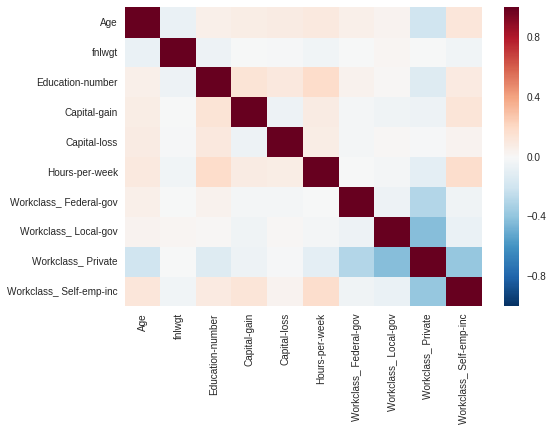

In [38]:
def corr_portion(begin,end):
    corr_dummies = resampled_data[input[begin:end]].corr()
    # plot the heatmap
    sns.heatmap(corr_dummies)

corr_portion(0,10)

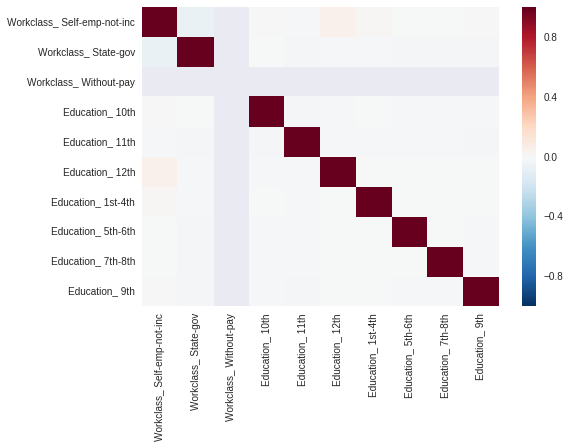

In [39]:
corr_portion(10,20)

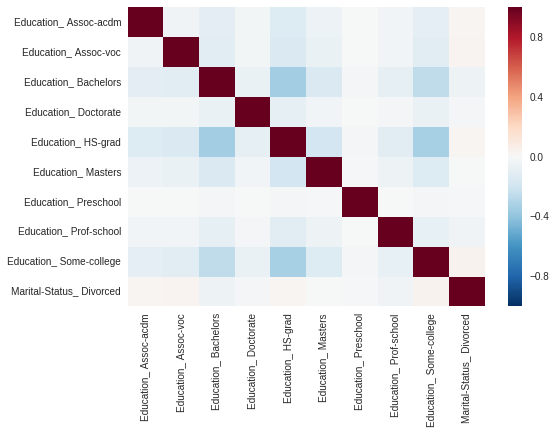

In [40]:
corr_portion(20,30)

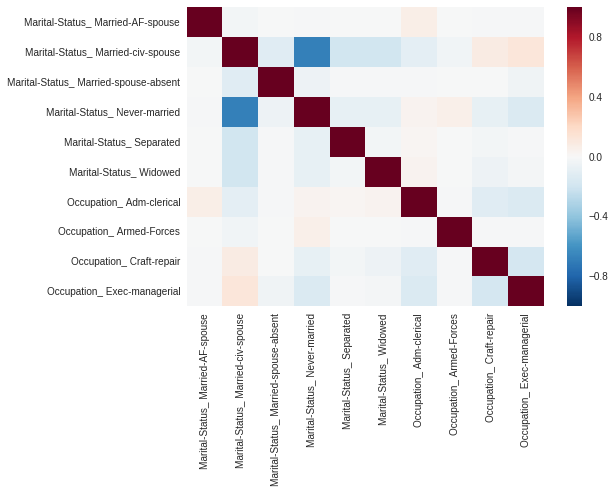

In [41]:
corr_portion(30,40)

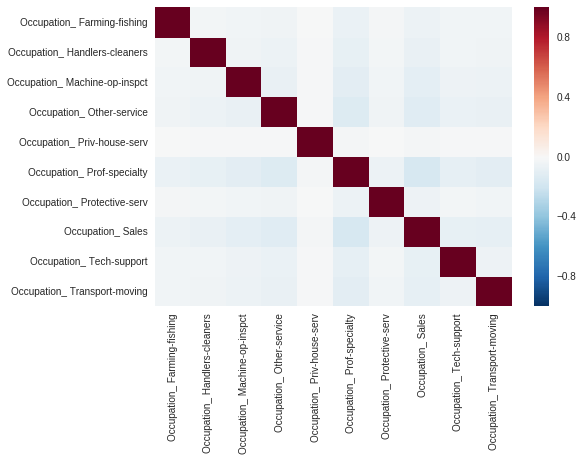

In [42]:
corr_portion(40,50)

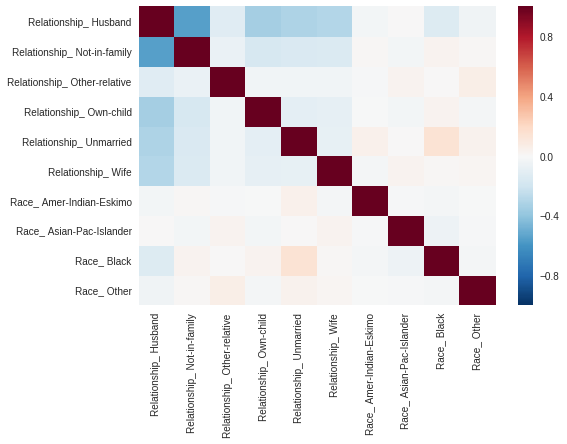

In [43]:
corr_portion(50,60)

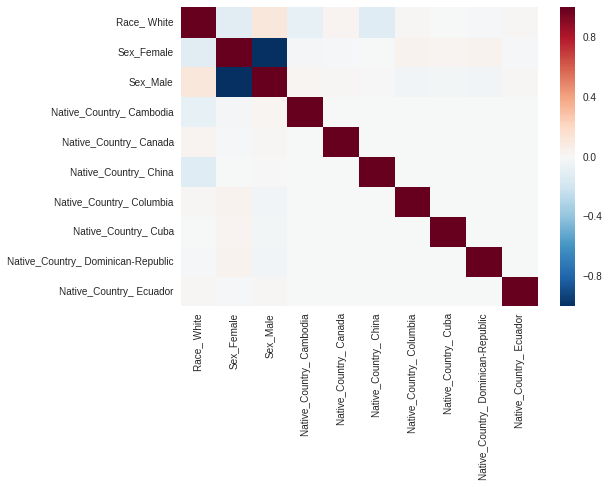

In [44]:
corr_portion(60,70)

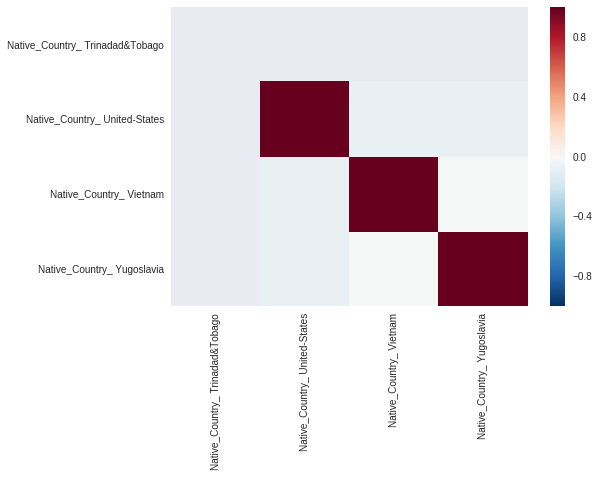

In [45]:
corr_portion(100,110)

In [46]:
#We will try to get rid of certain variables

last_filter=[item for item in input if (item!='Sex_Male' and item!='Relationship_ Not-in-family' and item!='Marital-Status_ Never-married')]

train, test = train_test_split(resampled_data, test_size = .15)

X_train=train[last_filter]
y_train=train['Superior_Inferior']

X_test=test[last_filter]
y_test=test['Superior_Inferior']


In [47]:
kernels=['rbf']
print('SVM results: ')

for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    print('Accuracy for SVM using '+kernel+ ' kernel : ',accuracy_score(pred,y_test))

SVM results: 
('Accuracy for SVM using rbf kernel : ', 0.5)


In [48]:
print('Multiple classifiers results: ')
for name, classifier in classifiers:
    for i in range(1): # 3 runs
        print (name)
        #classifier.fit(train_input, train_target )
        classifier.fit(X_train, y_train)
        end=time.time()
        pred = classifier.predict(X_test)
        print 'Accuracy for {} : '.format(name), accuracy_score(pred,y_test)

Multiple classifiers results: 
RandomForestClassifierG
Accuracy for RandomForestClassifierG :  0.79
RandomForestClassifierE
Accuracy for RandomForestClassifierE :  0.786666666667
AdaBoostClassifier
Accuracy for AdaBoostClassifier :  0.816666666667
ExtraTreesClassifier
Accuracy for ExtraTreesClassifier :  0.773333333333
DecisionTreeClassifier
Accuracy for DecisionTreeClassifier :  0.743333333333
MultinomialNB
Accuracy for MultinomialNB :  0.583333333333
SGDClassifier
Accuracy for SGDClassifier :  0.553333333333
GradientBoostingClassifier
Accuracy for GradientBoostingClassifier :  0.84
LinearSVC
Accuracy for LinearSVC :  0.5


## Trying a simple deep model using Keras for our classification:

In [49]:
X_train_arr=np.array(X_train[last_filter])
Y_train_arr=np.array(y_train)

X_test_arr=np.array(X_test[last_filter])
Y_test_arr=np.array(y_test)

In [102]:
#We perform the right shaping procedures to feed our deep model
from keras.utils import np_utils

nb_classes = max(Y_train_arr)+1
Y_train = np_utils.to_categorical(Y_train_arr, nb_classes)
Y_test = np_utils.to_categorical(Y_test_arr, nb_classes)

X=X_train_arr.reshape(X_train_arr.shape[0],X_train_arr.shape[1])
y=Y_train.reshape(Y_train.shape[0],Y_train.shape[1])

X_tes, y_tes= X_test_arr.reshape(X_test_arr.shape[0],X_test_arr.shape[1]),\
    Y_test.reshape(Y_test.shape[0],Y_test.shape[1])

print(X.shape)
print(y.shape)

(1700, 101)
(1700, 2)


In [52]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
dimof_input = X.shape[1]
dimof_output = y.shape[1]

batch_size = 16
dimof_middle = 50
dropout = 0.1
epochs = 20
verbose = 1


# Set model
def build_model(dimof_input,dimof_middle,dimof_output):
    model = Sequential()
    model.add(Dense(dimof_middle, input_dim=dimof_input))
    model.add(Dense(dimof_middle))
    model.add(Dense(dimof_output, activation='softmax'))
    return model

optimizers=['sgd']

for optimizer in optimizers :
    model=build_model(dimof_input,dimof_middle,dimof_output)
    model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

    model.fit(X,y,batch_size=batch_size, nb_epoch=epochs, verbose=1)
    model.evaluate(X_tes, y_tes, verbose=1)
     
    del model

/usr/local/lib/python2.7/dist-packages/keras/models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 2/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 3/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 4/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 5/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 6/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 7/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 8/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 9/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982      - ETA: 0s - loss: 7.9471 - acc: 0
Epoch 10/20
1700/1700 [==============================] - 0s - loss: 8.0875 - acc: 0.4982     
Epoch 11/20
1700/1700 [============

## Performing dimensionality reduction before proceeding with our models : 

In [91]:
#Dimensionality reduction

print ('X_train_vect: ( before dimensionality reduction )   ',X_train.shape)
print ('X_test_vect: ( before dimensionality reduction )   ',X_test.shape)

### PCA part

pca = decomposition.PCA(n_components=25)
pca_obj=pca.fit(X_train)
X_train_pca=pca_obj.transform(X_train)
X_test_pca=pca_obj.transform(X_test)

"""
### t_SNE part

tsne = TSNE(n_components=25, verbose=1, perplexity=40, n_iter=300)
X_train_tSNE = tsne.fit_transform(X_train)
X_test_tSNE = tsne.fit_transform(X_test)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
"""
##KernelPCA

kpca = decomposition.KernelPCA(n_components=25,kernel="poly",degree=4)
kpca_obj = kpca.fit(X_train)
X_train_kPCA = kpca_obj.transform(X_train)
X_test_kPCA = kpca_obj.transform(X_test)

"""

print ('X_train_pca:  ( after dimensionality reduction )  ',X_train_pca.shape)
print ('X_test_pca: ( after dimensionality reduction )   ',X_test_pca.shape)
"""

('X_train_vect: ( before dimensionality reduction )   ', (1700, 101))
('X_test_vect: ( before dimensionality reduction )   ', (300, 101))


"\n\nprint ('X_train_pca:  ( after dimensionality reduction )  ',X_train_pca.shape)\nprint ('X_test_pca: ( after dimensionality reduction )   ',X_test_pca.shape)\n"

Trying SVM model after performing PCA :

In [92]:
kernels=['rbf']
print('SVM results: ')

for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train_pca,y_train)
    pred=clf.predict(X_test_pca)
    print('Accuracy for SVM using '+kernel+ ' kernel : ',accuracy_score(pred,y_test))

SVM results: 
('Accuracy for SVM using rbf kernel : ', 0.5033333333333333)


Trying SVM model after performing Kernel based PCA :

In [93]:
kernels=['rbf']
print('SVM results: ')

for kernel in kernels:
    clf=svm.SVC(kernel=kernel)
    clf.fit(X_train_kPCA,y_train)
    pred=clf.predict(X_test_kPCA)
    print('Accuracy for SVM using '+kernel+ ' kernel : ',accuracy_score(pred,y_test))

SVM results: 
('Accuracy for SVM using rbf kernel : ', 0.48999999999999999)


Several models after performing PCA:

In [95]:
print('Multiple classifiers results: ')
for name, classifier in [classifier for classifier in classifiers if not classifier[0]=='MultinomialNB']:
    for i in range(1): # 3 runs
        print (name)
        #classifier.fit(train_input, train_target )
        classifier.fit(X_train_pca, y_train)
        end=time.time()
        pred = classifier.predict(X_test_pca)
        print 'Accuracy for {} : '.format(name), accuracy_score(pred,y_test)

Multiple classifiers results: 
RandomForestClassifierG
Accuracy for RandomForestClassifierG :  0.803333333333
RandomForestClassifierE
Accuracy for RandomForestClassifierE :  0.8
AdaBoostClassifier
Accuracy for AdaBoostClassifier :  0.833333333333
ExtraTreesClassifier
Accuracy for ExtraTreesClassifier :  0.776666666667
DecisionTreeClassifier
Accuracy for DecisionTreeClassifier :  0.736666666667
SGDClassifier
Accuracy for SGDClassifier :  0.526666666667
GradientBoostingClassifier
Accuracy for GradientBoostingClassifier :  0.806666666667
LinearSVC
Accuracy for LinearSVC :  0.503333333333


Several models after performing Kernel-based PCA:

In [94]:
print('Multiple classifiers results: ')
for name, classifier in [classifier for classifier in classifiers if not classifier[0]=='MultinomialNB']:
    for i in range(1): # 3 runs
        print (name)
        #classifier.fit(train_input, train_target )
        classifier.fit(X_train_kPCA, y_train)
        end=time.time()
        pred = classifier.predict(X_test_kPCA)
        print 'Accuracy for {} : '.format(name), accuracy_score(pred,y_test)

Multiple classifiers results: 
RandomForestClassifierG
Accuracy for RandomForestClassifierG :  0.79
RandomForestClassifierE
Accuracy for RandomForestClassifierE :  0.783333333333
AdaBoostClassifier
Accuracy for AdaBoostClassifier :  0.773333333333
ExtraTreesClassifier
Accuracy for ExtraTreesClassifier :  0.73
DecisionTreeClassifier
Accuracy for DecisionTreeClassifier :  0.67
SGDClassifier
Accuracy for SGDClassifier :  0.49
GradientBoostingClassifier
Accuracy for GradientBoostingClassifier :  0.783333333333
LinearSVC
Accuracy for LinearSVC :  0.49
